# Avocados: A Passion Project

                                                                                    Kalina Huynh
                                                                                    kalinahuynh@berkeley.edu

Avocados have been around forever, however society seems to have just recently discovered them. Perhaps it was a result of the famous meme of the toddler opening up a gift to which he happily replied, "It's an avocado, thanks!" Ever since then, trendy cafes charge around $10 for a slice of avocado toast. Critics hypothesize that there is a direct correlation of the amount of avocado toast millenials are purchasing and whether or not they own a home.

In all seriousness, this juptyer notebook exhibits my skills of:
EDA, python, pandas, numpy, seaborn, matplotlib, data visualization, and more...

In [94]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import YouTubeVideo

pd.set_option('max_colwidth', 280)

%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set()
sns.set_context("talk")
import re

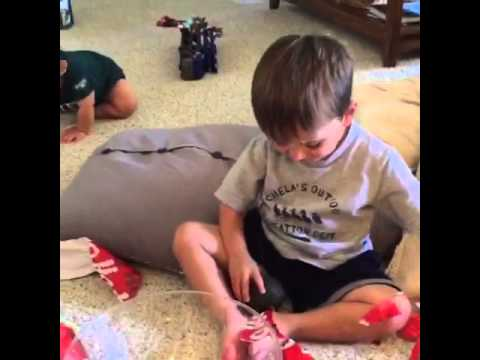

In [95]:
YouTubeVideo(id='wG2-y5Yf1Oo', width=500, height=300)

In [96]:
avo = pd.read_csv('avocado.csv').drop(columns='Unnamed: 0')
avo['Date'] = pd.DatetimeIndex(avo['Date'])
avo.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [97]:
avo['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

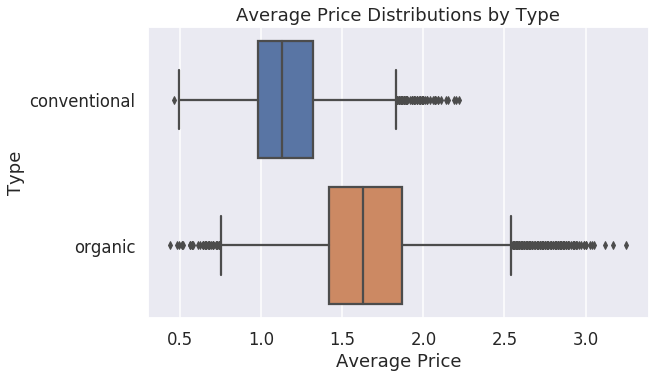

In [98]:
plt.figure(figsize=[8, 5])
sns.boxplot(x='AveragePrice', y='type', data=avo);
plt.title('Average Price Distributions by Type')
plt.xlabel('Average Price')
plt.ylabel('Type');

Boxplot to illustrate the difference of average price by type of avocado.

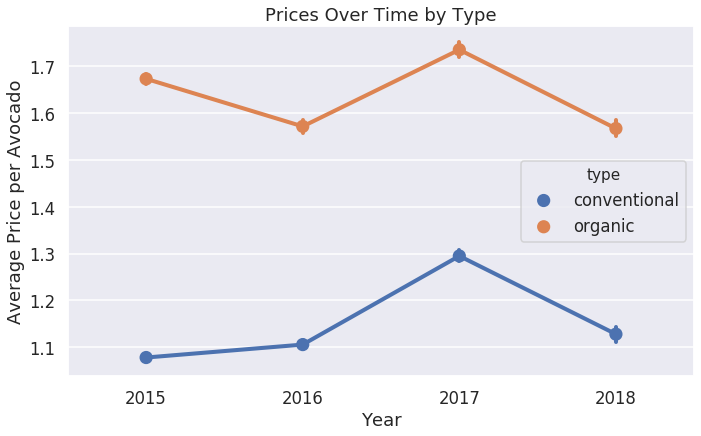

In [99]:
plt.figure(figsize=[10, 6])
sns.pointplot(x='year', y='AveragePrice', hue='type', data=avo);
plt.xlabel('Year')
plt.ylabel('Average Price per Avocado')
plt.title('Prices Over Time by Type');

Used a point plot to see the change in prices over time of each type of avocado.

It is obvious that organic avocados are more expensive than conventional avocados. In addition to this, the average price per avocado between conventional and organic seems to be directly related, this means as conventional avocado prices increase so do organic avocado prices.

This graph also shows a peak in average price at the beginning of 2017, perhaps this is the peak of avocado trendiness. 

In [100]:
avoAvg = pd.merge(avo, avo.groupby('region').agg({'AveragePrice':'mean'}), how='left', on='region')
avoAvg.head()

,Date,AveragePrice_x,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,AveragePrice_y
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,1.561036
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,1.561036
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,1.561036
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,1.561036
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,1.561036


In [101]:
avgReg = avo.groupby('region').agg({'AveragePrice':'mean'}).reset_index()
avgReg.head()

,region,AveragePrice
0,Albany,1.561036
1,Atlanta,1.337959
2,BaltimoreWashington,1.534231
3,Boise,1.348136
4,Boston,1.530888


Dataframe of regions and their average price per avocado.

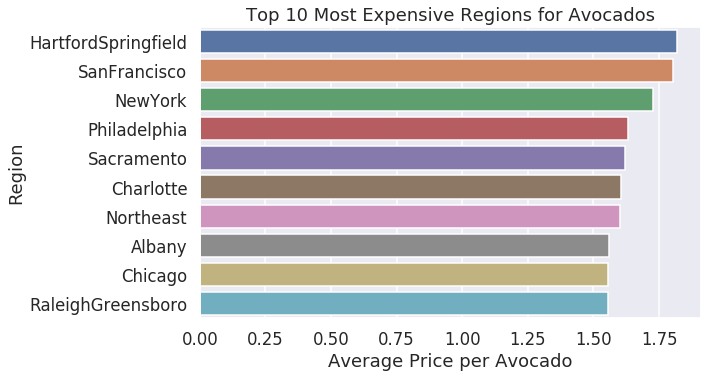

In [102]:
plt.figure(figsize=[8, 5])
sns.barplot(x='AveragePrice', y='region', data=avgReg.sort_values(
    'AveragePrice', ascending=False).head(10));
plt.title('Top 10 Most Expensive Regions for Avocados')
plt.xlabel('Average Price per Avocado')
plt.ylabel('Region');

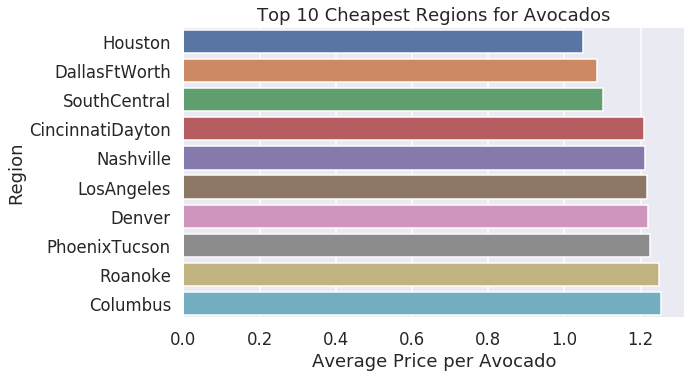

In [103]:
plt.figure(figsize=[8, 5])
sns.barplot(x='AveragePrice', y='region', data=avgReg.sort_values(
    'AveragePrice', ascending=True).head(10));
plt.title('Top 10 Cheapest Regions for Avocados')
plt.xlabel('Average Price per Avocado')
plt.ylabel('Region');

Above I made a graph to illustrate the top 10 most expensive and cheapest regions for avocados. It is not a shocker that avocados purchased in San Francisco, California are almost double the price of avocados in Houston, Texas. Although, another thing to note is that surprisingly Los Angeles, California, a not so inexpensive city, is among the top 10 cheapest regions to purchase avocados, this may be related to its close proximity to Mexico.

In [104]:
avo['month'] = avo['Date'].dt.month_name()
avo.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,December
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,December
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,December
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,December
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,November


Created a month column, so that I can now create a season column.

In [105]:
seasons = {'December': 'Winter', 'January': 'Winter', 'February': 'Winter', 
           'March': 'Spring', 'April': 'Spring', 'May': 'Spring',
           'June': 'Summer', 'July': 'Summer', 'August': 'Summer', 
           'September': 'Autumn', 'October': 'Autumn', 'November': 'Autumn', }
seasons2 = {'Winter': ['December', 'January', 'February'],
            'Spring': ['March', 'April', 'May'],
            'Summer': ['June', 'July', 'August'],
            'Autumn': ['September', 'October', 'November']}

Dictionary of seasons as the keys and months as the values.

In [106]:
avo['season'] = avo['month'].map(seasons)
avo.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,season
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,December,Winter
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,December,Winter
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,December,Winter
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,December,Winter
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,November,Autumn


Avo DF now includes a column for the season.

In [107]:
szn_cnt = avo['season'].value_counts().to_frame().reset_index().rename(columns={'index': 'season', 'season': 'count'})
szn_cnt

,season,count
0,Winter,5075
1,Spring,4752
2,Autumn,4212
3,Summer,4210


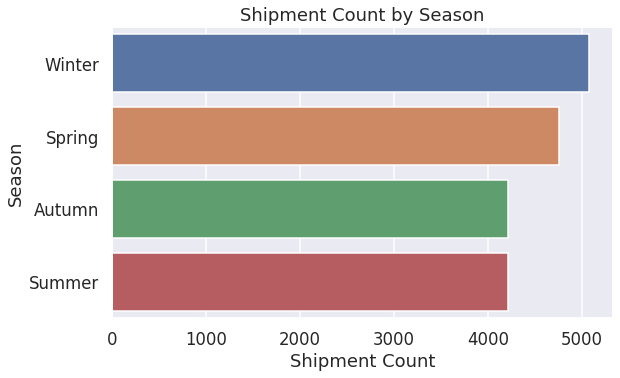

In [108]:
plt.figure(figsize=[8, 5])
sns.barplot(x='count', y='season', data=szn_cnt);
plt.title('Shipment Count by Season')
plt.xlabel('Shipment Count')
plt.ylabel('Season');

Graph for the shipment count by season. 

Avocados seem to available all year long, but winter has the greatest amount of shipments while summer has the lowest amount of shipments.

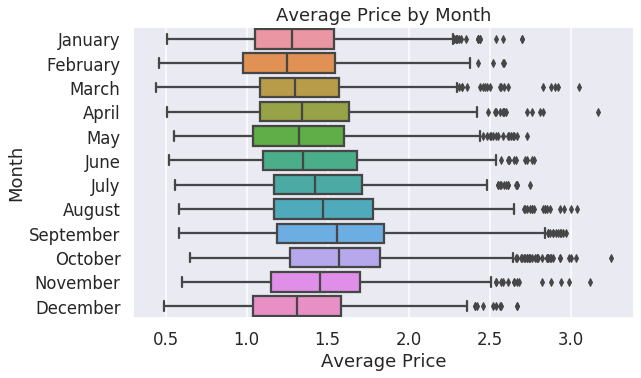

In [109]:
plt.figure(figsize=[8, 5])
sns.boxplot(x='AveragePrice', y='month', data=avo.sort_values('Date'));
plt.title('Average Price by Month')
plt.xlabel('Average Price')
plt.ylabel('Month');

Boxplot for the average price per avocado by individual month. 

Considering the greatest amount of shipments occurs during winter, it is not surprising that these winter months also have the cheapest average prices since there is more supply. Conversely, summer months have the most expensive average prices since there is less supply.

In [110]:
convt = avo[avo['type'] == 'conventional']
convt['month_num'] = convt['Date'].dt.month
convt.head()

/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,season,month_num
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,December,Winter,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,December,Winter,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,December,Winter,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,December,Winter,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,November,Autumn,11


In [111]:
org = avo[avo['type'] == 'organic']
org['month_num'] = org['Date'].dt.month
org.head()

/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,season,month_num
9126,2015-12-27,1.83,989.55,8.16,88.59,0.0,892.80,892.80,0.00,0.0,organic,2015,Albany,December,Winter,12
9127,2015-12-20,1.89,1163.03,30.24,172.14,0.0,960.65,960.65,0.00,0.0,organic,2015,Albany,December,Winter,12
9128,2015-12-13,1.85,995.96,10.44,178.70,0.0,806.82,806.82,0.00,0.0,organic,2015,Albany,December,Winter,12
9129,2015-12-06,1.84,1158.42,90.29,104.18,0.0,963.95,948.52,15.43,0.0,organic,2015,Albany,December,Winter,12
9130,2015-11-29,1.94,831.69,0.00,94.73,0.0,736.96,736.96,0.00,0.0,organic,2015,Albany,November,Autumn,11


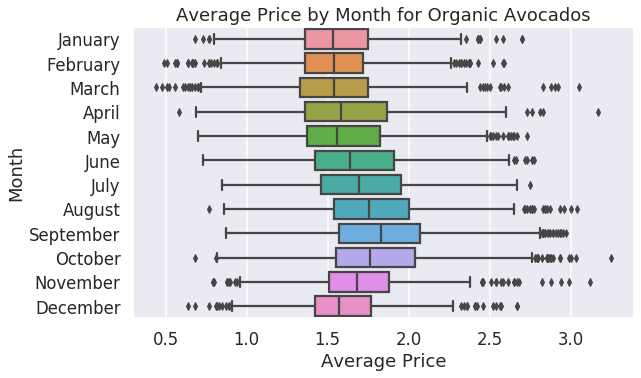

In [112]:
plt.figure(figsize=[8, 5])
sns.boxplot(x='AveragePrice', y='month', data=org.sort_values('Date'));
plt.title('Average Price by Month for Organic Avocados')
plt.xlabel('Average Price')
plt.ylabel('Month');

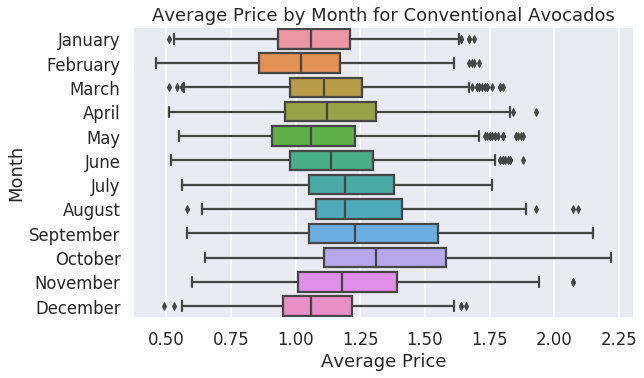

In [113]:
plt.figure(figsize=[8, 5])
sns.boxplot(x='AveragePrice', y='month', data=convt.sort_values('Date'));
plt.title('Average Price by Month for Conventional Avocados')
plt.xlabel('Average Price')
plt.ylabel('Month');

Above are boxplots for the average price per avocado by individual month sorted for organic and conventional avocados seperately. 

These boxplots show the difference in price distributions by month between organic and convention avocados. In the boxplot for organic avocados, the distribution of prices by month all start at approximately 1.50. On the other hand, the price distributions for conventional avocados by month start from about 1.00 upward to 1.50. 

Another interesting observation is that there are wider spreads in September and October conventional avocado pirces. A large spread of varying price demonstrates that there are many avocados of different sizes and weights, which would result in different prices.

In [114]:
from sklearn.utils import shuffle
avo_shuffled = shuffle(avo)
avo_shuffled.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,season
15279,2017-11-05,1.67,7478.89,569.29,1069.47,0.00,5840.13,5688.86,151.27,0.00,organic,2017,Columbus,November,Autumn
8876,2018-03-11,0.58,1619549.79,941189.25,269078.43,14057.17,395224.94,227505.97,161870.08,5848.89,conventional,2018,PhoenixTucson,March,Spring
11188,2015-05-03,0.88,21016.71,259.08,13301.01,0.00,7456.62,1570.00,5886.62,0.00,organic,2015,Roanoke,May,Spring
18010,2018-03-18,1.36,13856.99,991.86,30.88,0.00,12834.25,12827.59,6.66,0.00,organic,2018,Pittsburgh,March,Spring
14476,2016-01-31,0.91,8047.41,1065.99,618.90,0.00,6362.52,28.36,6334.16,0.00,organic,2016,StLouis,January,Winter


In [115]:
training_proportion = 8/10
num_avos_ships = avo_shuffled.shape[0]

num_train = num_avos_ships * training_proportion
num_test = num_avos_ships - num_train

train_avo = avo_shuffled.take(np.arange(num_train))
test_avo = avo_shuffled.take(np.arange(num_train, num_avos_ships))

print("Training: ",   train_avo.shape[0], ";",
      "Test: ",       test_avo.shape[0])

Training:  14600 ; Test:  3650


First, I used shuffle from the sklearn library so that the avocado df would not be in a particular order. Then, I split the data into a training set and a testing set with an 80:20 ratio.